# Netflix Original Films & IMDB Scores - EDA

This dataset consists of all Netflix original films released as of June 1st, 2021. Additionally, it also includes all Netflix documentaries and specials. The data was webscraped off of this Wikipedia page, which was then integrated with a dataset consisting of all of their corresponding IMDB scores. IMDB scores are voted on by community members, and the majority of the films have 1,000+ reviews.

THE dataset available on Kaggle.

Dataset consist of:

- Title
- Genre
- Premiere date
- Runtime
- IMDB scores
- Languages

This colab notebooks cover this question:

1. In which language were the long-running films created according to the dataset? Make a visualization.
2. Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.
3. Which genre has the highest IMDB rating among movies shot in English?
4. What is the average 'runtime' of movies shot in 'Hindi'?
5. How many categories does the Genre Column have and what are they? Visualize it.
6. Find the 3 most used languages in the movies in the data set.
7. Top 10 Movies With IMDB Ratings
8. What is the correlation between IMDB score and 'Runtime'? Examine and visualize.
9. Top 10 Genre by IMDB Score
10. What are the top 10 movies with the highest 'runtime'? Visualize it.
11. In which year was the most movies released? Visualize it.
12. Which language movies have the lowest average IMDB rating? Visualize it.
13. Which year has the greatest total runtime?
14. What is the "Genre" where each language is used the most?
15. Is there any outlier data in the data set? Please explain.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df = pd.read_csv("/Users/sajanshergill/Downloads/NetflixOriginals.csv", encoding ="ISO-8859-1")
df

Title                  Genre  \
0                                Enter the Anime            Documentary   
1                                    Dark Forces               Thriller   
2                                        The App  Science fiction/Drama   
3                                 The Open House        Horror thriller   
4                                    Kaali Khuhi                Mystery   
..                                           ...                    ...   
579        Taylor Swift: Reputation Stadium Tour           Concert Film   
580  Winter on Fire: Ukraine's Fight for Freedom            Documentary   
581                      Springsteen on Broadway           One-man show   
582    Emicida: AmarElo - It's All For Yesterday            Documentary   
583     David Attenborough: A Life on Our Planet            Documentary   

              Premiere  Runtime  IMDB Score                  Language  
0       August 5, 2019       58         2.5          English/Japanese  
1      August 21, 2020       81         2.6                   Spanish  
2    December 26, 2019       79         2.6                   Italian  
3     January 19, 2018       94         3.2                   English  
4     October 30, 2020       90         3.4                     Hindi  
..                 ...      ...         ...                       ...  
579  December 31, 2018      125         8.4                   English  
580    October 9, 2015       91         8.4  English/Ukranian/Russian  
581  December 16, 2018      153         8.5                   English  
582   December 8, 2020       89         8.6                Portuguese  
583    October 4, 2020       83         9.0                   English  

[584 rows x 6 columns]

In [12]:
df.describe()

Runtime  IMDB Score
count  584.000000  584.000000
mean    93.577055    6.271747
std     27.761683    0.979256
min      4.000000    2.500000
25%     86.000000    5.700000
50%     97.000000    6.350000
75%    108.000000    7.000000
max    209.000000    9.000000

In [13]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [15]:
# Clean inconsistent date format
df['Premiere'] = df['Premiere'].str.replace(
    r'(\d{1,2})\.\s*(\d{4})', 
    r'\1, \2', 
    regex=True
)

# Convert to datetime
df['Premiere'] = pd.to_datetime(df['Premiere'])

# Extract parts
df['year'] = df['Premiere'].dt.year
df['month'] = df['Premiere'].dt.month_name()
df['weekday'] = df['Premiere'].dt.day_name()

df.head()

Title                  Genre   Premiere  Runtime  IMDB Score  \
0  Enter the Anime            Documentary 2019-08-05       58         2.5   
1      Dark Forces               Thriller 2020-08-21       81         2.6   
2          The App  Science fiction/Drama 2019-12-26       79         2.6   
3   The Open House        Horror thriller 2018-01-19       94         3.2   
4      Kaali Khuhi                Mystery 2020-10-30       90         3.4   

           Language  year     month   weekday  
0  English/Japanese  2019    August    Monday  
1           Spanish  2020    August    Friday  
2           Italian  2019  December  Thursday  
3           English  2018   January    Friday  
4             Hindi  2020   October    Friday

### 1-In which language were the long-running films created according to the dataset? Make a visualization.


                Language     Runtime
3           English/Akan  136.000000
22  Khmer/English/French  136.000000
25               Marathi  121.666667
7         English/Korean  121.000000
31       Spanish/Catalan  116.000000


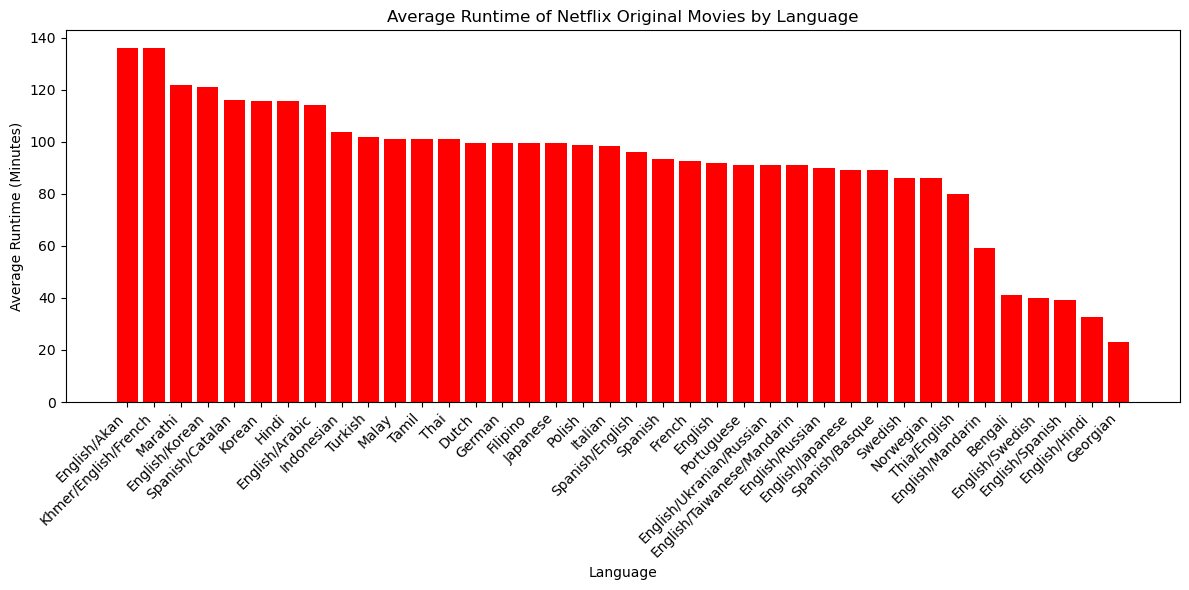

In [18]:
df['Runtime'] = pd.to_numeric(
    df['Runtime'].astype(str).str.replace(' min', '', regex=False),
    errors='coerce'
)

# Drop missing runtimes
df = df.dropna(subset=['Runtime'])

# --- ANALYSIS ---
# Average runtime per language
lang_runtime = (
    df.groupby('Language', as_index=False)['Runtime']
      .mean()
      .sort_values(by='Runtime', ascending=False)
)

print(lang_runtime.head())

# --- VISUALIZATION ---
plt.figure(figsize=(12,6))
plt.bar(lang_runtime['Language'], lang_runtime['Runtime'], color='red')
plt.xticks(rotation=45, ha='right')
plt.ylabel("Average Runtime (Minutes)")
plt.xlabel("Language")
plt.title("Average Runtime of Netflix Original Movies by Language")
plt.tight_layout()
plt.show()

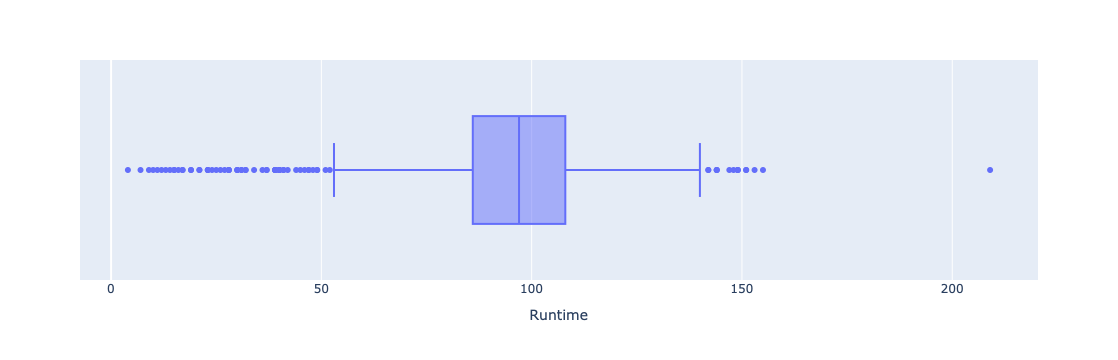

In [19]:
fig = px.box(df, x= 'Runtime', hover_data = df[['Title','Language']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

## 2-Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.


In [21]:
df_doc = df[
    (
        (df["year"] == 2019)
        |
        (
            (df["year"] == 2020)
            & df["month"].isin(["January","February","March","April","May","June"])
        )
    )
    & (df["Genre"] == "Documentary")
]


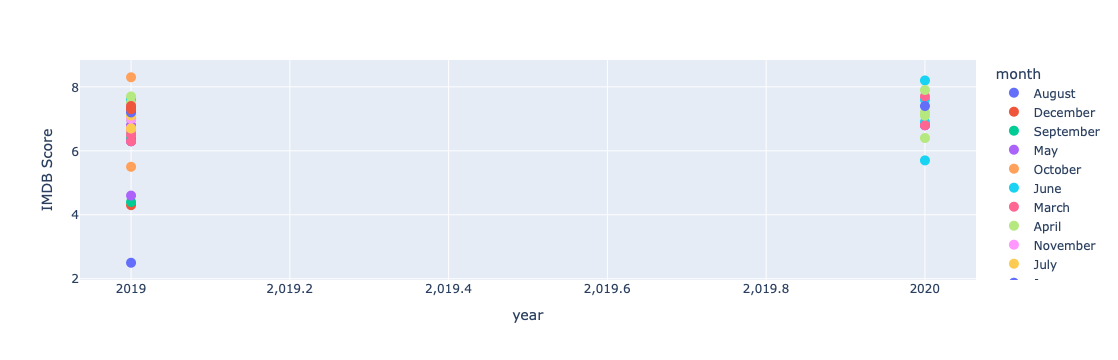

In [22]:
fig = px.scatter(df_doc, x='year', y='IMDB Score', color="month")
fig.update_traces(marker_size=10)
fig.show()

## 3-Which genre has the highest IMDB rating among movies shot in English?


In [25]:
# Filter English movies
top_imdb_english = df[df["Language"] == "English"]

# Make sure IMDB is numeric
top_imdb_english["IMDB Score"] = pd.to_numeric(
    top_imdb_english["IMDB Score"], errors="coerce"
)

# Sort and take top 10
top_imdb_english = (
    top_imdb_english
    .sort_values(by="IMDB Score", ascending=False)
    .head(10)
)

# Set multi-index to get hierarchical display like screenshot
top_imdb_english = (
    top_imdb_english
    .set_index(["Language", "Genre", "Title"])[["Runtime", "IMDB Score", "year"]]
)

top_imdb_english


/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_13691/3191674379.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Runtime  \
Language Genre                                Title                                                 
English  Documentary                          David Attenborough: A Life on Our Planet         83   
         One-man show                         Springsteen on Broadway                         153   
         Concert Film                         Taylor Swift: Reputation Stadium Tour           125   
                                              Ben Platt: Live from Radio City Music Hall       85   
         Documentary                          Dancing with the Birds                           51   
                                              Cuba and the Cameraman                          114   
                                              Seaspiracy                                       89   
         Animation/Christmas/Comedy/Adventure Klaus                                            97   
         Documentary                          Disclosure: Trans Lives on Screen               107   
                                              13th                                            100   

                                                                                          IMDB Score  \
Language Genre                                Title                                                    
English  Documentary                          David Attenborough: A Life on Our Planet           9.0   
         One-man show                         Springsteen on Broadway                            8.5   
         Concert Film                         Taylor Swift: Reputation Stadium Tour              8.4   
                                              Ben Platt: Live from Radio City Music Hall         8.4   
         Documentary                          Dancing with the Birds                             8.3   
                                              Cuba and the Cameraman                             8.3   
                                              Seaspiracy                                         8.2   
         Animation/Christmas/Comedy/Adventure Klaus                                              8.2   
         Documentary                          Disclosure: Trans Lives on Screen                  8.2   
                                              13th                                               8.2   

                                                                                          year  
Language Genre                                Title                                             
English  Documentary                          David Attenborough: A Life on Our Planet    2020  
         One-man show                         Springsteen on Broadway                     2018  
         Concert Film                         Taylor Swift: Reputation Stadium Tour       2018  
                                              Ben Platt: Live from Radio City Music Hall  2020  
         Documentary                          Dancing with the Birds                      2019  
                                              Cuba and the Cameraman                      2017  
                                              Seaspiracy                                  2021  
         Animation/Christmas/Comedy/Adventure Klaus                                       2019  
         Documentary                          Disclosure: Trans Lives on Screen           2020  
                                              13th                                        2016

## 4-What is the average 'runtime' of movies shot in 'Hindi'?


In [27]:
df_hindi = df[df["Language"] == "Hindi"]
df_hindi.Runtime.value_counts()
df_hindi.Runtime.mean()

np.float64(115.78787878787878)

## 5- How many categories does the Genre Column have and what are they? Visualize it.

In [28]:
df['Genre'].value_counts()
df['Genre'].value_counts().sum()
genre = df['Genre'].value_counts()

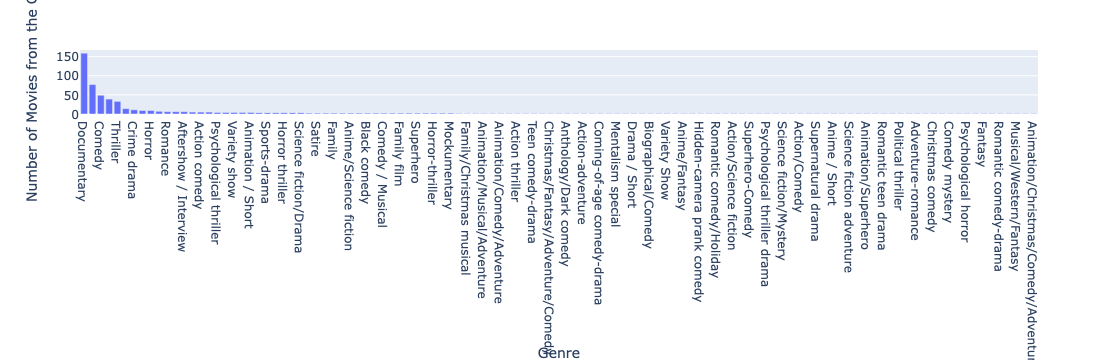

In [29]:
fig = px.bar(genre, x=genre.index, y=genre.values, labels={'y':'Number of Movies from the Genre', 'index':'Genres'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

## 6- Find the 3 most used languages in the movies in the data set.

In [30]:
# printing uinique values of Language
df.Language.unique()
df.Language.value_counts()

Language
English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georg

In [31]:
df_top_lang = df.Language.value_counts().nlargest(3)

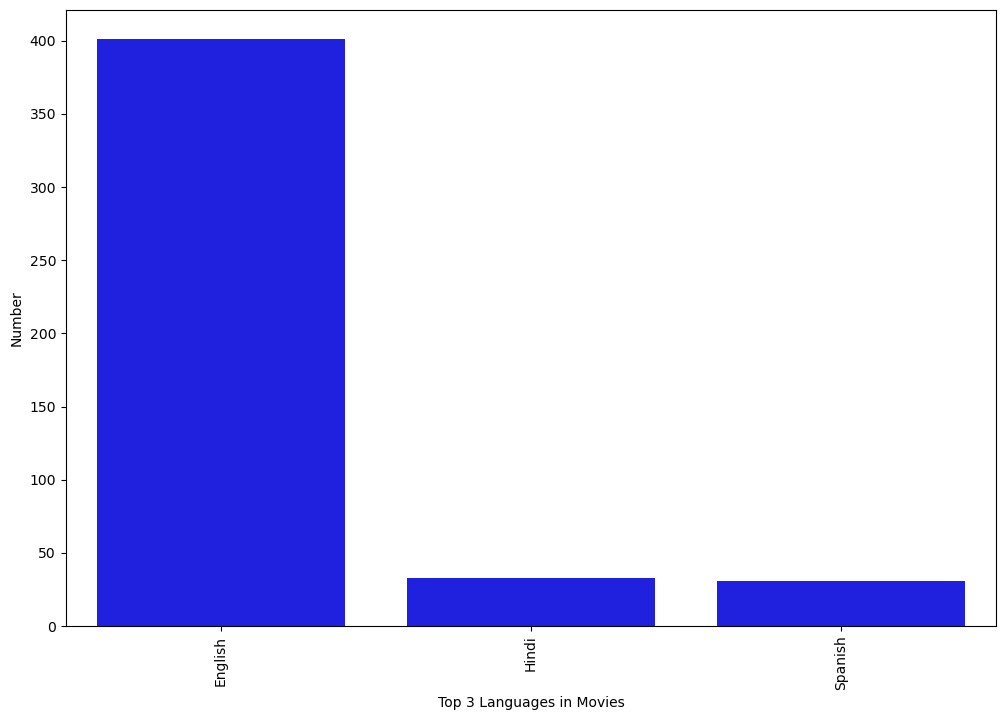

In [33]:
df_plot = df_top_lang.reset_index()
df_plot.columns = ['Language', 'Count']

plt.figure(figsize=(12, 8))
sns.barplot(data=df_plot, x='Language', y='Count', color='blue')
plt.xlabel('Top 3 Languages in Movies')
plt.ylabel('Number')
plt.xticks(rotation=90)
plt.show()


## 7- Top 10 Movies with IMDB Ratings

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_13691/915213844.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



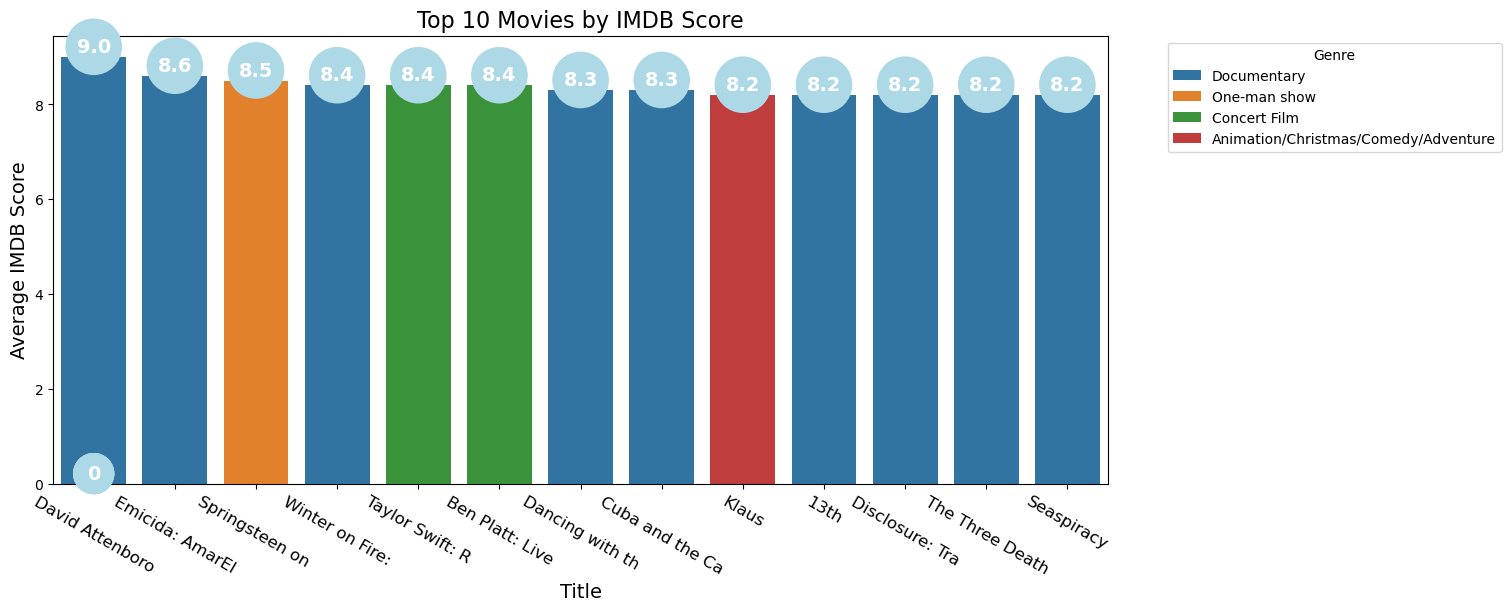

In [40]:
df_temp = df.sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:13,:]

fig, ax = plt.subplots(1, 1, figsize=(15, 6), constrained_layout=True)
ax = sns.barplot(x='Title', y='IMDB Score', data=df_temp, hue='Genre')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.1,
            s = f"{i.get_height()}",
            ha = 'center', size = 14, weight ='bold', rotation = 0, color='white',
            bbox = dict(boxstyle="circle, pad=0.5", fc ='lightblue', ec="lightblue", lw=2))

ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Title'].unique()], fontsize=12, rotation=-30)
plt.title("Top 10 Movies by IMDB Score", fontsize = 16)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left');

## 8- What is the correlation between IMDB score and 'Runtime'? Examine and visualize

In [41]:
df[['IMDB Score', 'Runtime']].corr()

IMDB Score   Runtime
IMDB Score    1.000000 -0.040896
Runtime      -0.040896  1.000000

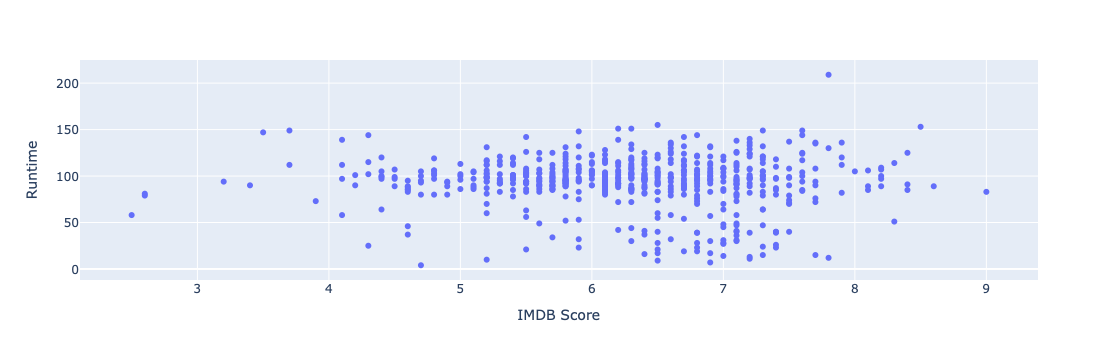

In [42]:
fig = px.scatter(df, x='IMDB Score', y='Runtime')
fig.show()

## 9- Top 10 Genre by IMDB Score

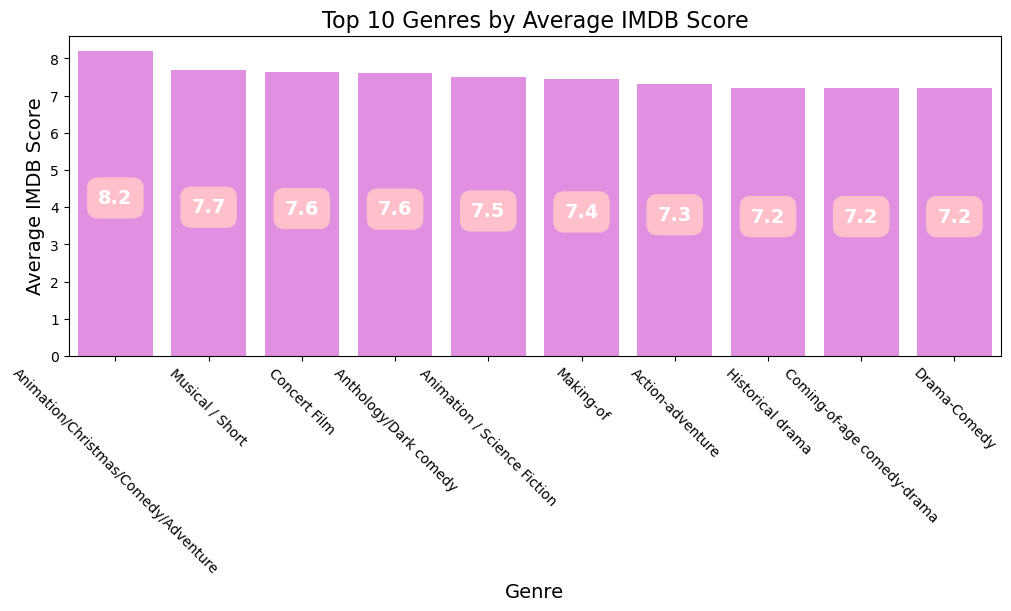

In [48]:
# Average IMDB score by Genre
df_temp = (
    df.groupby('Genre', as_index=False)['IMDB Score']
      .mean()
      .sort_values(by='IMDB Score', ascending=False)
      .head(10)
)

fig, ax = plt.subplots(1, 1, figsize=(10, 6), constrained_layout=True)

sns.barplot(x='Genre', y='IMDB Score', data=df_temp, color='violet', ax=ax)

# labels inside bars
for i in ax.patches:
    ax.text(
        i.get_x() + i.get_width()/2,
        i.get_height()/2,
        f"{round(i.get_height(), 1)}",
        ha='center',
        size=14,
        weight='bold',
        color='white',
        bbox=dict(boxstyle="round, pad=0.5", fc='pink', ec='pink', lw=2)
    )

ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)

# rotate x labels nicely
plt.xticks(rotation=-45)

plt.title('Top 10 Genres by Average IMDB Score', fontsize=16)
plt.show()


## What are the top 10 movies with the highest 'runtime'? Visualize it

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_13691/859292990.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




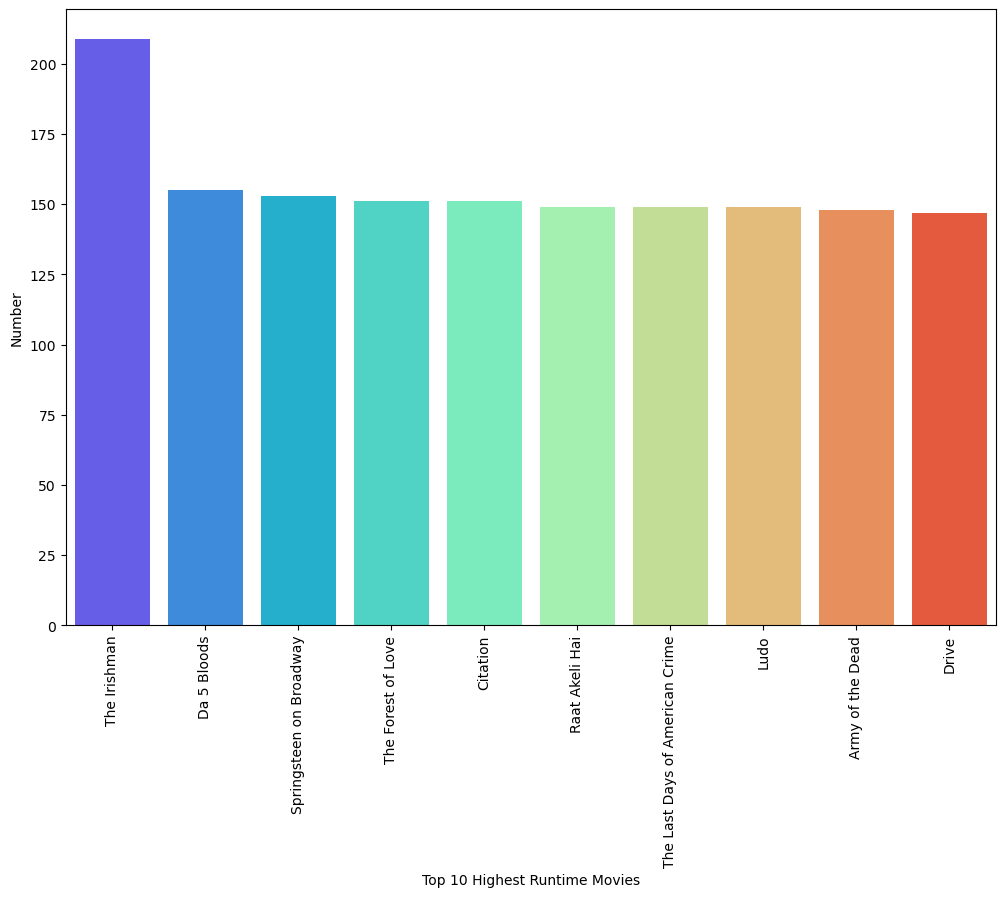

In [49]:
df_temp = df.groupby(['Title']).mean(['Runtime rating']).sort_values(by='Runtime', ascending= False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12, 8))
sns.barplot(x=df_temp["Title"], y=df_temp["Runtime"], data=df, palette = 'rainbow')
plt.xlabel('Top 10 Highest Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

## 11- In which year was the most movies released? Visualize it

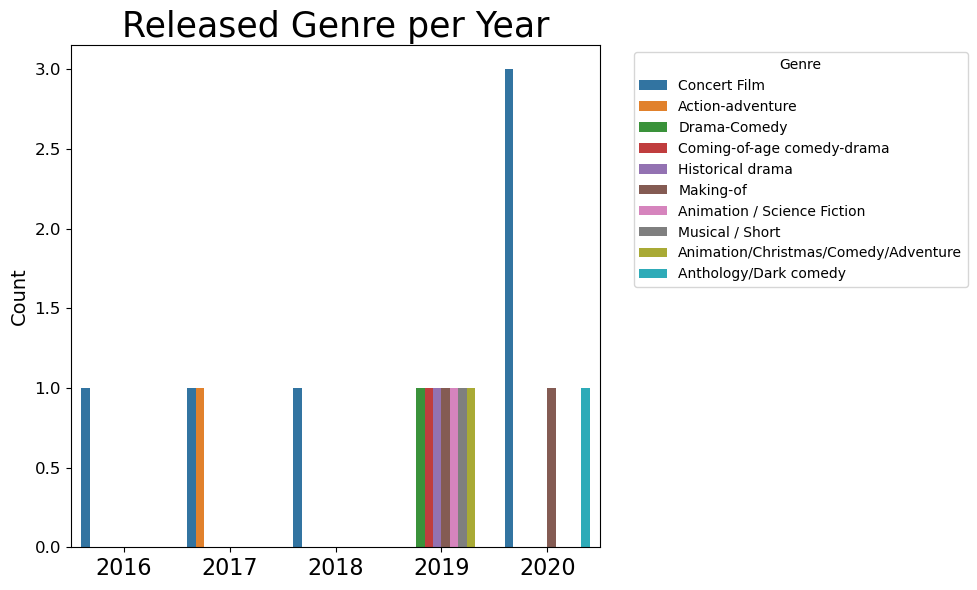

In [52]:
top_genres = (
    df.groupby('Genre')['IMDB Score']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .index
)

# -----------------------------
# 2. Filter dataframe to only those top genres
# -----------------------------
df_top = df[df['Genre'].isin(top_genres)]

# -----------------------------
# 3. Plot: Released Genre per Year
# -----------------------------
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df_top,
    x='year',      # x-axis: release year
    hue='Genre'    # different color per genre
)

plt.title('Released Genre per Year', fontsize=25)
plt.xlabel(None)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)

plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_13691/3515735140.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




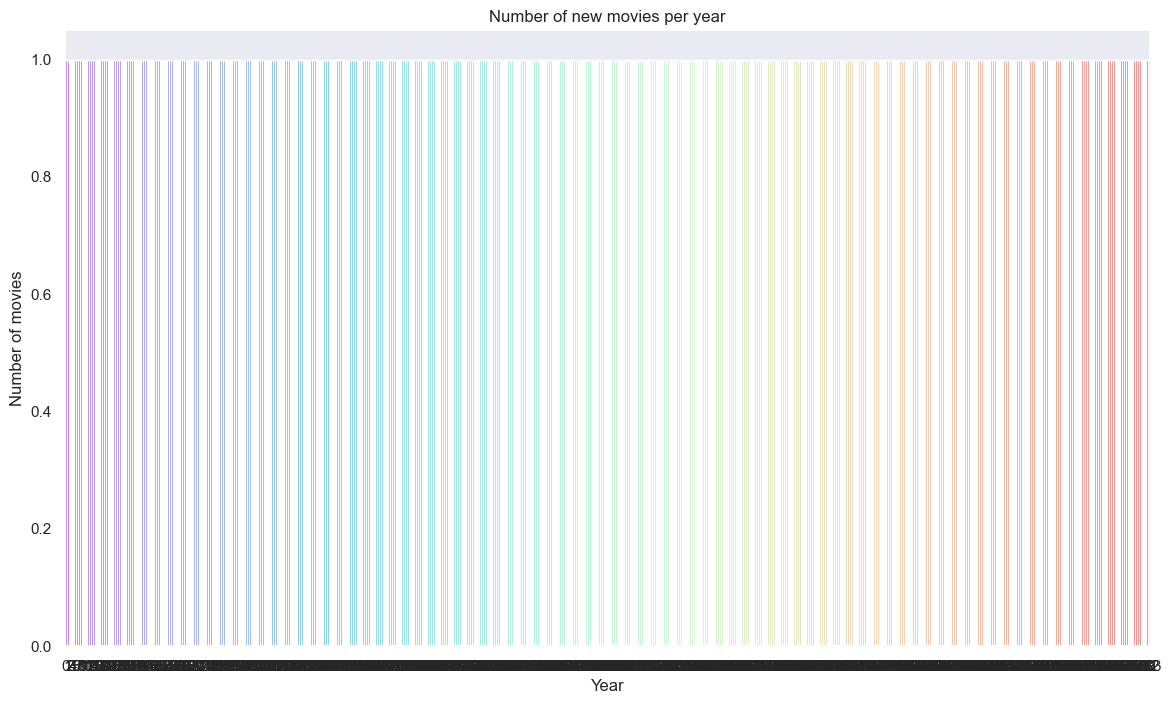

In [53]:
sns.set(rc={'figure.figsize':(14, 8)})

ax= sns.countplot(df['year'], palette='rainbow')
ax.set_title('Number of new movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

## 12- Which language movies have the lowest average IMDB rating? Visualize it

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_13691/1889446181.py:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



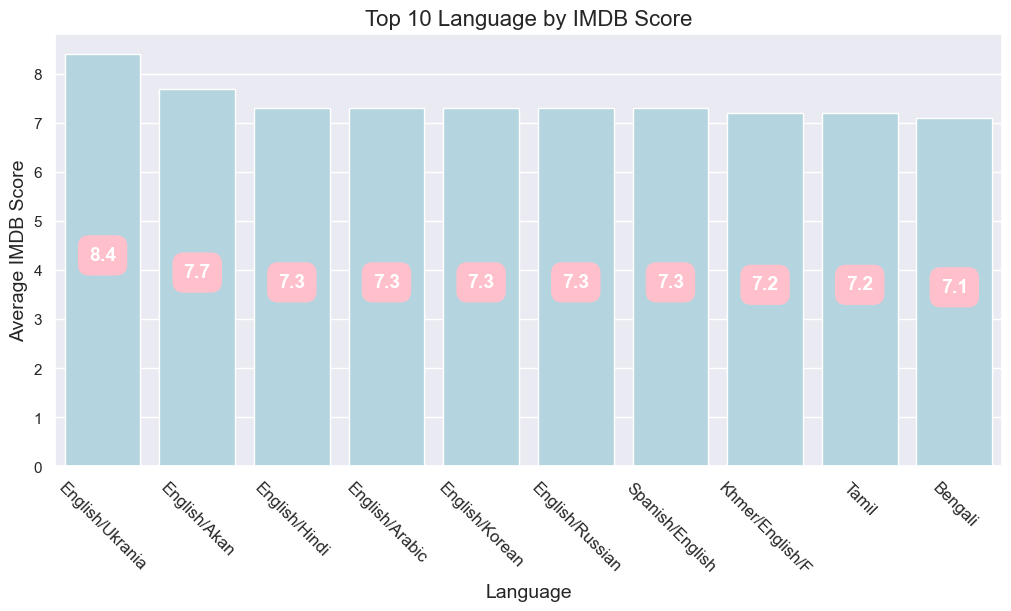

In [54]:


df_temp=df.groupby(['Language']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = sns.barplot(x = 'Language', y = 'IMDB Score', data = df_temp, color = 'lightblue')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))


ax.set_xlabel('Language', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Language'].unique()], fontsize=12, rotation = -45 )
plt.title('Top 10 Language by IMDB Score', fontsize=16);

## 13- Which year has the greatest total runtime?

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_13691/901100394.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




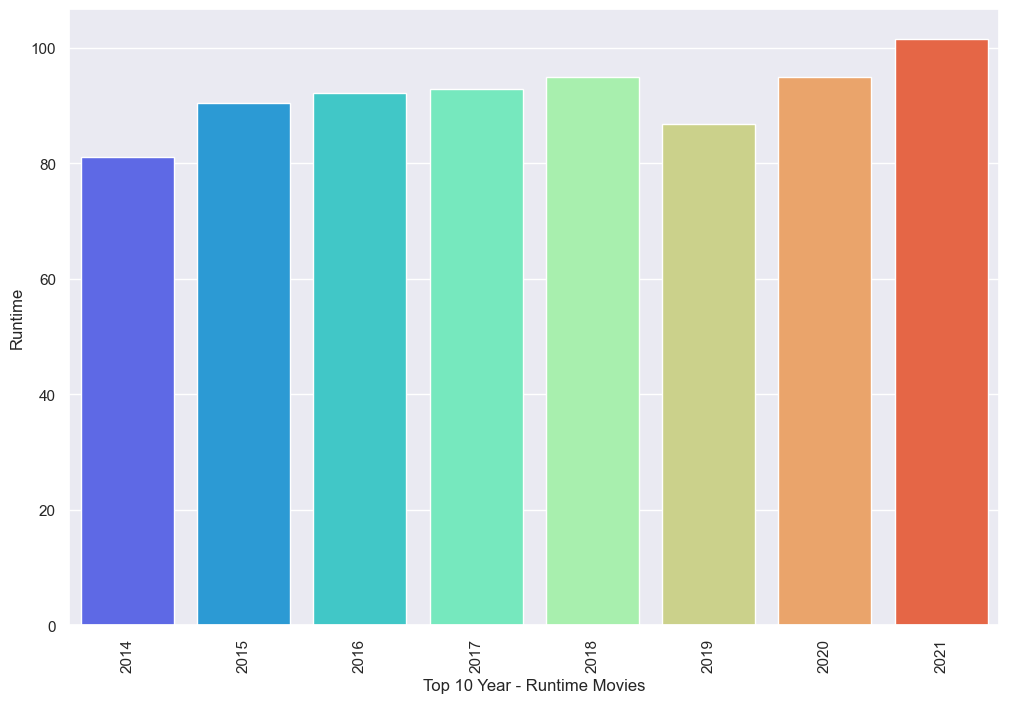

In [56]:
df_temp = df.groupby(['year']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10, :2]

#plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_temp["year"], y=df_temp["Runtime"], data=df, palette='rainbow')
plt.xlabel('Top 10 Year - Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Runtime')
plt.show()

In [58]:
df_run= df[df["year"] == 2021]
df_run.Runtime.mean()

np.float64(101.6056338028169)

## 14- What is the "Genre" where each language is used the most?

In [59]:
genre_lang=[]
for i in df.Language.unique():
    df_lang = df[df["Language"] ==i]
    df_lang_genre = df_lang.Genre.value_counts().nlargest(1)
    #print(f'*************************************************')
    #print(f'Language: {i}\n', df_lang_genre)
    genre_lang.append((i, df_lang_genre))

In [60]:
df_lang = pd.DataFrame(genre_lang, columns = ["Language", "Genre"])
df_lang.sort_values(by=['Language'], ignore_index=True)

Language  \
0                      Bengali   
1                        Dutch   
2                      English   
3                 English/Akan   
4               English/Arabic   
5                English/Hindi   
6             English/Japanese   
7               English/Korean   
8             English/Mandarin   
9              English/Russian   
10             English/Spanish   
11             English/Swedish   
12  English/Taiwanese/Mandarin   
13    English/Ukranian/Russian   
14                    Filipino   
15                      French   
16                    Georgian   
17                      German   
18                       Hindi   
19                  Indonesian   
20                     Italian   
21                    Japanese   
22        Khmer/English/French   
23                      Korean   
24                       Malay   
25                     Marathi   
26                   Norwegian   
27                      Polish   
28                  Portuguese   
29                     Spanish   
30              Spanish/Basque   
31             Spanish/Catalan   
32             Spanish/English   
33                     Swedish   
34                       Tamil   
35                        Thai   
36                Thia/English   
37                     Turkish   

                                                Genre  
0    Genre
Documentary    1
Name: count, dtype: int64  
1   Genre
Romantic comedy    1
Name: count, dtype:...  
2   Genre
Documentary    120
Name: count, dtype: i...  
3      Genre
War drama    1
Name: count, dtype: int64  
4    Genre
Documentary    1
Name: count, dtype: int64  
5    Genre
Documentary    2
Name: count, dtype: int64  
6    Genre
Documentary    1
Name: count, dtype: int64  
7   Genre
Action-adventure    1
Name: count, dtype...  
8    Genre
Documentary    2
Name: count, dtype: int64  
9    Genre
Documentary    1
Name: count, dtype: int64  
10   Genre
Documentary    5
Name: count, dtype: int64  
11   Genre
Documentary    1
Name: count, dtype: int64  
12         Genre
Drama    1
Name: count, dtype: int64  
13   Genre
Documentary    1
Name: count, dtype: int64  
14         Genre
Drama    1
Name: count, dtype: int64  
15   Genre
Documentary    6
Name: count, dtype: int64  
16   Genre
Documentary    1
Name: count, dtype: int64  
17      Genre
Thriller    1
Name: count, dtype: int64  
18        Genre
Drama    13
Name: count, dtype: int64  
19         Genre
Drama    3
Name: count, dtype: int64  
20         Genre
Drama    4
Name: count, dtype: int64  
21  Genre
Anime/Science fiction    2
Name: count, ...  
22         Genre
Drama    1
Name: count, dtype: int64  
23         Genre
Drama    2
Name: count, dtype: int64  
24  Genre
Action comedy    1
Name: count, dtype: i...  
25         Genre
Drama    2
Name: count, dtype: int64  
26        Genre
Horror    1
Name: count, dtype: int64  
27        Genre
Horror    1
Name: count, dtype: int64  
28        Genre
Comedy    6
Name: count, dtype: int64  
29   Genre
Documentary    8
Name: count, dtype: int64  
30  Genre
Black comedy    1
Name: count, dtype: int64  
31   Genre
Documentary    1
Name: count, dtype: int64  
32   Genre
Documentary    1
Name: count, dtype: int64  
33      Genre
Thriller    1
Name: count, dtype: int64  
34         Genre
Drama    1
Name: count, dtype: int64  
35        Genre
Horror    1
Name: count, dtype: int64  
36   Genre
Documentary    1
Name: count, dtype: int64  
37        Genre
Comedy    2
Name: count, dtype: int64

## 15- Is there any outlier data in the data set? Please explain

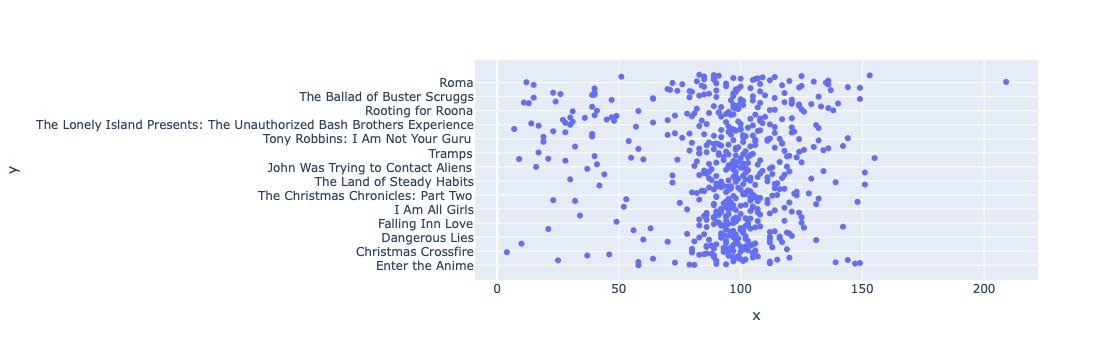

In [61]:
fig = px.scatter(x=df['Runtime'], y=df['Title'])
fig.show()